In [0]:
import pylab as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Downloading the data
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv


In [0]:
# loading and storing the data
df = pd.read_csv("FuelConsumption.csv")
df.describe()

cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]


In [0]:
# splitting train test datasets into 80/20
mask = np.random.rand(len(df)) < 0.8

# using the Practice features instructed by Saeed Sir
train = cdf[mask]
test = cdf[~mask]

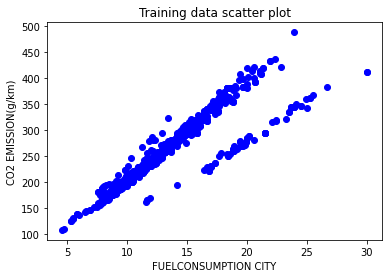

In [9]:
# Visualizing the data to observe the curve/trend
plt.scatter(train.FUELCONSUMPTION_CITY, train.CO2EMISSIONS, color = "blue")
plt.title("Training data scatter plot")
plt.xlabel("FUELCONSUMPTION CITY")
plt.ylabel("CO2 EMISSION(g/km)")
plt.show()

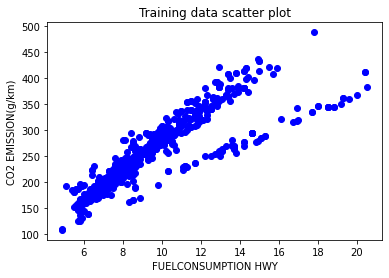

In [11]:
# Visualizing the another feature 
plt.scatter(train.FUELCONSUMPTION_HWY, train.CO2EMISSIONS, color = "blue")
plt.title("Training data scatter plot")
plt.xlabel("FUELCONSUMPTION HWY")
plt.ylabel("CO2 EMISSION(g/km)")
plt.show()

**The relationship seems strong enough to be studied by Regression**

**TRAINING**

In [23]:
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()

# defining training data axis
train_x = np.asanyarray(train[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])

# Fitting the Hyperplain of best fit
linear_regression.fit(train_x, train_y)

# Coefficients and intercept
coefs = linear_regression.coef_.tolist()
intercept = linear_regression.intercept_.tolist()

# Printing
print("Coefficients: {}".format(coefs[0]))
print("Intercept:    {:.2f}".format(intercept[0]))

Coefficients: [10.485832793383477, 7.403719471909049, 6.3770265243892394, 3.161544391824787]
Intercept:    63.53


**PREDICTION**

In [34]:
# defining testing data axis
test_x = test[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY"]]
test_y = test[["CO2EMISSIONS"]] # TARGET OUTPUTS

# predicting data with model
y_hat = linear_regression.predict(test_x) # PREDICTED OUTPUTS

# Model Accuracy Evaluation through MSSR
print("Mean Sum of Squared Residuals: {:.2f}".format(float(np.mean((y_hat - y) ** 2))))

# explained variance score evalMetric: 1 score is perfect model
# A word about score: Score actually is stored in model after having been tested
# on test data, so it shows variance between actual output values and predicted
# values, as it is uses recent data or points as reference therefore
# we test it by supplying real outputs instead of predicted output. if we 
# provide predicted outputs, it will consider the model to be 100% correct he
# -nce providing score of 1. 
print("Explained Variance: {:.2f}".format(linear_regression.score(test_x, test_y)))

Mean Sum of Squared Residuals: 518.66
Explained Variance: 0.87


**OUR MODEL IS NOW PREDICTING VALUES WITH 87% ACCURACY**